First we import our libraries.

In [60]:
from keras.datasets import mnist, fashion_mnist
from keras import utils, layers, models, losses
import tensorflow
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Now we load the datasets, splitting them into their separate groups (train and test sets, respectively).
\* Use one of MNIST digits or Fashion-MNIST

In [61]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('MNIST digits train set size is: {}'.format(train_images.shape))
print('MNIST digits train labels size is: {}'.format(train_labels.shape))
print('MNIST digits test set size is: {}'.format(test_images.shape))
print('MNIST digits test labels size is: {}'.format(test_labels.shape))

11501568/11490434 [==============================] - 0s 0us/step
MNIST digits train set size is: (60000, 28, 28)
MNIST digits train labels size is: (60000,)
MNIST digits test set size is: (10000, 28, 28)
MNIST digits test labels size is: (10000,)


Plotting a random image and its corresponding label, just to make sure everything is ok!

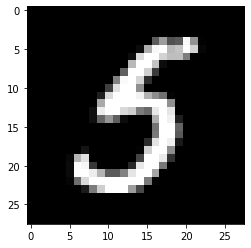

5


In [62]:
plt.imshow(train_images[805], cmap='gray')
plt.show()
print(train_labels[805])

Before feeding the data into the neural network, first we need to add a dummy axis for channels (because our images are in grayscale), and then normalize it.

In [63]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = utils.np_utils.to_categorical(train_labels)
test_labels = utils.np_utils.to_categorical(test_labels)

Now we construct the LeNet-5 architecture.

In [64]:
model = models.Sequential()
# First Layer
model.add(layers.Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPool2D(pool_size=2, strides=2))
# Second Layer
model.add(layers.Conv2D(filters=48, kernel_size=5, strides=1, activation='relu', input_shape=(14,14, 32)))
model.add(layers.MaxPool2D(pool_size=2, strides=2))
#Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
adam = Adam(lr=5e-4)
model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Printing the overall information of the architecture we created.

In [65]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 48)          38448     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 48)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 768)               0         
                                                                 
 dense_36 (Dense)            (None, 256)             

Now we train!

In [66]:
model.fit(train_images, train_labels, epochs=30, batch_size=10, validation_split=0.25)

Epoch 1/30
4500/4500 [==============================] - 29s 6ms/step - loss: 0.1375 - accuracy: 0.9577 - val_loss: 0.0553 - val_accuracy: 0.9825
Epoch 2/30
4500/4500 [==============================] - 27s 6ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0447 - val_accuracy: 0.9866
Epoch 3/30
4500/4500 [==============================] - 28s 6ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0385 - val_accuracy: 0.9887
Epoch 4/30
4500/4500 [==============================] - 27s 6ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.0388 - val_accuracy: 0.9887
Epoch 5/30
4500/4500 [==============================] - 27s 6ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0557 - val_accuracy: 0.9852
Epoch 6/30
4500/4500 [==============================] - 27s 6ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0433 - val_accuracy: 0.9891
Epoch 7/30
4500/4500 [==============================] - 28s 6ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0458 - val_ac

And finally, we evaluate on the test set!

In [67]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.1196 - accuracy: 0.9890


[0.1195773333311081, 0.9890000224113464]